<a href="https://colab.research.google.com/github/UlyShel/basics_of_deep_learning/blob/main/HW4_Shelegova_Ulyana_OGO_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
<img src="https://raw.githubusercontent.com/dvgodoy/PyTorch101_ODSC_Europe2020/master/images/linear_dogs.jpg" width="800">

# Основы глубинного обучения: домашнее задание 4
</center>

**ФИО:** Шелегова Ульяна Александровна

**Забавный факт о себе:** я изображена слева на верхней картинке, будьте мягче

## Общая информация

__Дата выдачи:__ 26.11.2024

__Мягкий дедлайн:__ 23:59MSK 10.12.2024

__Жесткий дедлайн:__ 23:59MSK 13.12.2024

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 бонусных балла.

**Дисклеймер:** Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник). Также помните, что простое копирование чужого кода не является самостоятельной работой.

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.notebook import tqdm

In [ ]:
import torch
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

# Описание данных

Данные можно [скачать с гугл-диска.](https://drive.google.com/drive/folders/11oCcLplWtp_qm-WuEbfCFP_Mz5K_z3ps?usp=sharing) Если вы делаете задание в колабе, то строчки ниже сами скачают вам данные.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


В таблице `ria_news.tsv`  лежат данные о новостях, вышедших на сайте РИА-НОВОСТИ с 15 марта 2018 года по 31 декабря 2018 года.

- `href` - уникальный идентификатор новости (ссылка на неё)
- `date` - дата публикации новости
- `time` - время публикации новости
- `title` - заголовок новости
- `snippet` - краткое описание новости
- `text` - текст новости
- `category` - категория новости
- `keywords` - ключевые слова (подкатегории новости)
- `shows` - счётчик с числом просмотров новости на сайте (на момент парсинга)

In [ ]:
df_ria = pd.read_csv('/content/drive/MyDrive/news_data/ria_news.tsv', sep='\t')
df_ria = df_ria[~df_ria.tags.isnull()]
print(df_ria.shape)
df_ria.head()

(201708, 9)


,href,date,time,title,snippet,text,category,tags,shows
0,/20181231/1548961410.html,2018-12-31,"31 декабря 2018, 23:52",Нетаньяху не собирается в отставку в случае пр...,Премьер-министр Израиля Биньямин Нетаньяху не ...,"МОСКВА, 31 дек - РИА Новости. Премьер-министр ...",В мире,"Биньямин Нетаньяху, Израиль, В мире",728.0
1,/20181231/1548961364.html,2018-12-31,"31 декабря 2018, 23:19",Макрон в новогоднем обращении затронул тему ре...,"Результат реформ не может быть мгновенным, зая...","ПАРИЖ, 31 дек – РИА Новости. Результат реформ ...",В мире,"Эммануэль Макрон, Франция, В мире",3086.0
2,/20181231/1548961337.html,2018-12-31,"31 декабря 2018, 23:12",Аарон Рэмзи проведет переговоры с пятью топ-кл...,"Полузащитник лондонского ""Арсенала"" Аарон Рэмз...","МОСКВА, 31 дек - РИА Новости. Полузащитник лон...",NaN,ФК Арсенал (Лондон),183.0
3,/20181231/1548961304.html,2018-12-31,"31 декабря 2018, 23:09",Гол Азмуна принес сборной Ирана победу над кат...,Футболисты сборной Ирана одержали победу над к...,"МОСКВА, 31 дек - РИА Новости. Футболисты сборн...",NaN,"Сердар Азмун, Сборная Ирана по футболу",78.0
4,/20181231/1548961265.html,2018-12-31,"31 декабря 2018, 23:07",Пятая ракетка мира дель Потро пропустит Открыт...,Аргентинский теннисист Хуан Мартин дель Потро ...,"МОСКВА, 31 дек - РИА Новости. Аргентинский тен...",NaN,Теннис,79.0


Многие новостные агенства поддерживают странички в социальных сетях. Они постят туда самые сочные сюжеты. В таблице `vk_news.tsv` лежат данные о новостях, которые РИА запостили ВКонтакте в период времени с  `2017-09-29 01:28:55` по `2019-02-01 23:13:17`.

- `id` - уникальный идентификатор поста
- `href` - ссылка на сайт (если она была указана в посте)
- `datetime` - дата и время публикации новости
- `title` - заголовок новости
- `text` - текст новости в социальной сети
- `likes` - число лайков под постом
- `comments` - число комментариев под постом

In [ ]:
df_vk = pd.read_csv('/content/drive/MyDrive/news_data/vk_news.tsv', sep='\t')
df_vk['snippet'] = df_vk['text']
df_vk.drop('text', axis=1, inplace=True)
print(df_vk.shape)
df_vk.head()

(19928, 7)


,id,href,datetime,title,likes,comments,snippet
0,24006362,/20190201/1550280358.html,2019-02-01 23:13:17,"В ДНР заявили о задержании диверсантов, причас...",15,28,NaN
1,24006240,/20190201/1550268781.html,2019-02-01 22:38:41,"Житель Урала ""заминировал"" ТЦ из-за снятия со...",32,42,NaN
2,24006100,/20190201/1550282212.html,2019-02-01 21:58:52,"В Черном море нашли ""потерянный флот Гитлера""",84,23,NaN
3,24005972,/20190202/1550283179.html,2019-02-01 21:27:06,В США освободили задержанную российскую актрис...,58,35,NaN
4,24005764,/20190201/1550262848.html,2019-02-01 20:55:54,Толкнувший Скабееву депутат Рады заявил о гроз...,45,145,NaN


В таблице `vk_comments.tsv` лежат комментарии к новостям.

- `id` - уникальный идентификатор комментария
- `post_id` - идентификатор новости, под которой был оставлен комментарий
- `datetime` - дата и время, когда был оставлен комментарий
- `text` - текст комментария
- `likes` - число лайков под комментарием

In [ ]:
df_comments = pd.read_csv('/content/drive/MyDrive/news_data/vk_comments.tsv', sep='\t')
df_comments = df_comments[~df_comments.text.isnull()]
print(df_comments.shape)
df_comments.head()

<ipython-input-6-165c5acb7e06>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_comments = pd.read_csv('/content/drive/MyDrive/news_data/vk_comments.tsv', sep='\t')


(2612629, 5)


,id,post_id,datetime,text,likes
0,24006366.0,24006362.0,2019-02-01 23:14:14,ЧВК Вагнера?,5.0
1,24006370.0,24006362.0,2019-02-01 23:15:23,"[id4710641|Евгений], выздоравливай.",3.0
2,24006371.0,24006362.0,2019-02-01 23:16:21,"[id442655034|Андрей], искренне желаю этого все...",4.0
3,24006374.0,24006362.0,2019-02-01 23:16:38,Опять про Украину новости?,1.0
4,24006375.0,24006362.0,2019-02-01 23:16:40,Че такое ДНР?,2.0


# А что надо сделать то?

В тетрадке вам предстоит сделать следующие шаги:

1. Обучить нейросеть предсказывать категорию новости
2. Построить предсказания для тех новостей, где мы ничего не знаем о категории
3. Использовать уже обученный для сентимент-анализа классификатор из библиотеки `hugging face` чтобы предсказать эмоциональную окраску каждого комментария
4. Провести аналитику по новостям, а именно построите топы из самых позитивных и негативных категорий и новостей

Для первого шага вам будет дан бэйзлайн. Если вы его прогоните, у вас получится базовая модель, которая даст некоторое качество решения задачи. Вам надо будет выяснить, насколько это качество оказалось хорошим, а затем внести в код некоторые улучшения.



## Часть 1: категоризация новостей (5 баллов + 1.8 бонусных)

Каждой новости в соотвествие поставлены ключевые слова. Будем считать, что эти ключевые слова — тематики новости. Нужно научиться предсказывать тематики по тексту новости. Готовые тематики у нас есть только по новостям с сайта. Они за 2018 год. По новостям из ВКонтакте у нас тематик нет. Мы собираемся их предсказать.

Новости, опубликованные ВКонтакте, отличаются от новостей с сайта тем, что у них есть только титул и короткое описание. Странно будет обучать нейросеть на длинных текстах, а потом использовать её на коротких описаниях. Мы не будем так делать. Мы попробуем обучить базовый вариант нейронной сети только на заголовках новостей. Все, кто захочет получить бонусные баллы, смогут попробовать добавить в нейросеть сниппеты (так назыают короткие описания новостей).

## 1.1 Подготовка таргета

Поработаем с таргетом. Мы будем предсказывать переменную `tags`. Давайте выясним скоько уникальных тегов существует.

In [ ]:
from collections import Counter

# удалим все лишние пробелы и сделаем lowercase
df_ria['tags'] = (
    df_ria.tags.
    apply(lambda w: ','.join([item.strip() for item in  w.lower().split(',')]))
)

tags = ','.join(list(df_ria.tags.values))
tags_cnt = Counter(tags.split(',')) # словарь частотности по всем тэгам

print(len(tags_cnt))
tags_cnt.most_common()[-20:]

13344


[('блог анны завершинской об автоспорте - блоги', 1),
 ('министерство транспорта рб', 1),
 ('министерство здравоохранения грузии', 1),
 ('палех', 1),
 ('юрий посохов (хореограф)', 1),
 ('мария александрова', 1),
 ('том бенсон', 1),
 ('абдул каюм кочай', 1),
 ('нуман куртулмуш', 1),
 ('mipim', 1),
 ('владимир попов', 1),
 ('брюно женезио', 1),
 ('роберт фицо', 1),
 ('сергей пашинский', 1),
 ('валерия гонтарева', 1),
 ('нововоронеж', 1),
 ('императорское православное палестинское общество', 1),
 ('event_poslanie_prezidenta_rf_federalnomu_sobraniju', 1),
 ('фхтр', 1),
 ('игорь честин', 1)]

Всего в выборке есть порядка 13 000 тэгов. Многие встречаются всего по разу. Давайте оставим в выборке только те тэги, которые встречаются более 30 раз.

In [ ]:
target_tags = {tag for tag,cnt in tags_cnt.most_common() if cnt > 30}
len(target_tags)

1583

Закодируем теги для OHE.

In [ ]:
tag2idx = dict(zip(target_tags, range(len(target_tags)))) # индекс для каждого тэга
idx2tag = {jtem: item for item,jtem in tag2idx.items()} # тэги теперь просто список индексов

Почистим таргет от лишних тэгов.

In [ ]:
df_ria['target_tags'] = (
    df_ria.tags.
    apply(lambda w: [tag2idx.get(item) for item in  w.split(',') if item in target_tags])
)

df_ria = df_ria[df_ria.target_tags.apply(len) > 0]
df_ria.shape

(201437, 10)

In [ ]:
df_ria.target_tags.values[:3]

array([list([138, 733, 1036]), list([326, 1049, 1036]), list([415])],
      dtype=object)

## 1.2 Подготовка текстов

Теперь займёмся предобработкой текстов. Приведём все слова к нижнему регистру и выбросим мусорные символы. В качестве токенов будем рассматривать отдельные слова.

Напомню, что мы пока что решили работать только с названиями статей. Поэтому вся предобработка применяется исключительно к ним. **Спойлер:** предобработку для сниппетов вы сделаете сами в первом же задании.

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import re
from nltk.tokenize import word_tokenize

def normalise_text(text):
    text = text.lower()

    # сурово регулярками выкидываем мусорные символы. убираем все символы, кроме букв и пробелов
    text = re.sub('[^а-яa-z0-9 ]', '', text)
    return text.strip()

df_ria['title_clean'] = df_ria.title.apply(normalise_text)

word_cnt = Counter(word_tokenize(' '.join(df_ria.title_clean.values)))
len(word_cnt)

112178

In [ ]:
word_cnt.most_common()[:10]

[('в', 127323),
 ('на', 44386),
 ('с', 26150),
 ('и', 21771),
 ('о', 19948),
 ('по', 17014),
 ('россии', 13494),
 ('не', 13483),
 ('сша', 9942),
 ('за', 9881)]

Давайте почистим словарь от стоп-слов и подготовим его к использованию внутри датасета. Мы будем с помощью словаря заменять слова на индексы. Добавим в словарь несколько специальных токенов для неизвестных слов и паддингов.

In [ ]:
from nltk.corpus import stopwords

stops_ru = set(stopwords.words('russian'))
len(stops_ru)

151

In [ ]:
vocabulary = {
    "#PAD#": 0, "#UNK#": 1
}

k = 2
for word, _ in word_cnt.most_common():
    if word not in stops_ru:
        vocabulary[word] = k
        k += 1

In [ ]:
len(vocabulary)

112030

Завернём код для создания словаря в функцию.

In [ ]:
def create_vocab(text, stops_ru=stops_ru):

    word_cnt = Counter(word_tokenize(text))
    vocabulary = {
        "#PAD#": 0, "#UNK#": 1
    }

    k = 2
    for word, _ in word_cnt.most_common():
        if word not in stops_ru:
            vocabulary[word] = k
            k += 1
    return vocabulary

__[0.5 балла] Задание 1:__

- Cделайте аналогичную предобработку титулов из таблички `df_vk`. Запишите получившийся результат в столбец `title_clean` по аналогии с таблицей `df_ria`.
- Сделайте для обеих таблиц предобработку колонок со сниппетами `snippet` и запишите получившийся результат в столбец `snippet_clean`. Все пропуски заполните токеном `"#UNKN"`.

In [ ]:
df_vk['title_clean'] = df_vk.title.apply(normalise_text)

def normalise_snippet(text):
    if pd.isna(text):
        return "#UNKN"

    text = text.lower()
    text = re.sub('[^а-яa-z0-9 ]', '', text)
    return text.strip()

df_ria['snippet_clean'] = df_ria.snippet.apply(normalise_snippet)
df_vk['snippet_clean'] = df_vk.snippet.apply(normalise_snippet)

## 1.3 Поставка данных

Пересечение сайта и ВК по опубликованным новостям довольно маленькое. Мы обучаем модель на данных с сайта. Предсказания мы будем строить на данных из ВК. У этих данных разная природа. В ВК описание статей и заголовки короче. Модель может хорошо показать себя на данных с новостного сайта, но сильно просесть в качестве на данных из ВК.

Давайте сохраним пересечение в отдельную табличку, чтобы на нём можно было понять, насколько сильно деградирует модель.

In [ ]:
ria_hrefs = set(df_ria.href.values) # href - уникальный идентификатор новости
vk_hrefs = set(df_vk.href.values)
test_hrefs = (vk_hrefs & ria_hrefs) # тест для модели

print('Размер отложенной выборки:', len(test_hrefs))

df = df_ria[~df_ria.href.isin(test_hrefs)] # для трейна все новости, которые не пересекаются

Размер отложенной выборки: 1128


По странному совпадению (я правда не знаю почему) пересечение лежит в декабре. Мы будем его использовать как тестовую выборку.

In [ ]:
df_ria[df_ria.href.isin(test_hrefs)].date.min(), df_ria[df_ria.href.isin(test_hrefs)].date.max()

('2018-12-06', '2018-12-31')

Предположим, что мы делим выборку на обучающую и тестовую случайно. За один и тот же промежуток времени может выйти довольно большое число новостей с одинаковым заголовком. Давайте представим себе, что в тесте и трэйне есть много статей про одно и то же событие. Модель научилась на обучающей выборке хорошо его тегировать. Остальные события модель тегирует намного хуже. Метрики на тестовой выборке высокие. В следующем месяце СМИ перестают освещать это событие, в потоке новостей совершенно другие новости. Качество модели резко проседает.

Чтобы не напороться на завышенные метрики, обычно выборку дробят на обучающую и тестовую по времени. Тогда статьи из теста будут имитировать поток новых новостей, освещающих новые события.

In [ ]:
df.date.min(), df.date.max() # очень умно на самом деле так делать, но, возможно, стоит разделять не только по пересечении: времени
# стоит применить политический анализ и политологические знания в целом, чтобы не напороться на critical junctures
# можно обучить модель иначе, взяв для теста конец марта - апрель из-за пожара в зимней вишне
# это событие стало критичным и повлекло за собой разные изменения в policies, которые происходят не так часто
# надеюсь, наш выбор теста не повлекет за собой гиперфокус на критические события

('2018-03-15', '2018-12-31')

__[0.5 балла] Задание 2:__ Разбейте выборку на обучающую, валидационную и тестовую. В тест возьмите весь декабрь. В валидацию октябрь и ноябрь.

In [ ]:
df_ria['date'] = pd.to_datetime(df_ria['date'])

df_train = df_ria[df_ria['date'].dt.month.isin([3, 4, 5, 6, 7, 8, 9])]
df_val = df_ria[df_ria['date'].dt.month.isin([10, 11])]
df_test = df_ria[df_ria.href.isin(test_hrefs)]

Сформируем отложенную выборку (пересечение ВКонтакте и РИА).

In [ ]:
df_oob = df_vk[df_vk.href.isin(test_hrefs)][['href', 'title_clean']]

df_ria_oob = df_ria[df_ria.href.isin(test_hrefs)][['href', 'target_tags']]
df_oob = df_oob.set_index('href').join(df_ria_oob.set_index('href')).reset_index()
df_oob.head()

,href,title_clean,target_tags
0,/20181231/1548960744.html,митрополит рязанский раскритиковал иронию судьбы,[1565]
1,/20181231/1548958617.html,на украине позавидовали стене на границе с крымом,"[960, 1036]"
2,/20181231/1548957394.html,в госдуме предложили отказаться от газа в жилы...,"[734, 734, 662, 367, 513]"
3,/20181231/1548954909.html,названы лучшие средства от похмелья,[1565]
4,/20181231/1548957120.html,новогоднее поздравление порошенко разозлило по...,"[960, 1036]"


Напишем датасет для поставки данных в нейросеть.


In [ ]:
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

class NewsDataset(Dataset): # заголовки и метки в нужный формат для обучения

    def __init__(self, target, title, vocab, vocab_size, max_title_len, max_classes, snippet=None, max_snippet_len=None):

       self.vocab = {word: idx  for word,idx in vocab.items() if idx < vocab_size}
       self.max_classes = max_classes
       self.y=self.target_ohe(target)
       self.X_title = self.create_text(title, max_title_len)

       # задание 1.3
       self.X_snippet = None
       if snippet is not None: # если сниппет есть, то делаем токенизацию
        self.X_snippet = self.create_text(snippet, max_snippet_len)

    def target_ohe(self, target): # метки OHE для каждого класса
        y = torch.zeros((len(target), self.max_classes))
        for i, t in enumerate(target):
            y[[i]*len(t), t] = 1.0
        return y

    def create_text(self, texts, max_len): # токенизация заголовка (заменяем слова на индексы)
        result = [ ]
        for sent in texts:
            # {#PAD: 0, #UNKN: 1}
            sent_tokenize = [self.vocab.get(item, 1) for item in word_tokenize(sent)]

            # приводим все тексты к max_len (к одинаковой длине - обрезаем / добавляем нули) - паддинг
            if len(sent_tokenize) >= max_len:
                sent_tokenize = sent_tokenize[:max_len]
            else:
                sent_tokenize += [0] * (max_len - len(sent_tokenize))
            result.append(sent_tokenize)
        return torch.tensor(result, dtype=torch.int)

    def __len__(self):
        return len(self.X_title) # количество новостей

    def __getitem__(self, idx): # одна новость из датасета

        # задание 1.3
        if self.X_snippet is not None: # если сниппет не None
            return self.X_title[idx, :], self.X_snippet[idx, :], self.y[idx] # название, сниппет и метка
        else:
            return self.X_title[idx, :], self.y[idx]


__[0.5 балла] Задание 3:__ Сейчас датасет умеет работать только с полем `title_clean`. Давайте сделаем этот датасет более многофукнциональным и добавим в него возможность добавить в обработку данных сниппет.

1. Внутри датасета `snippet` надо обработать точно также как и `title`.
2. Если `snippet=None`, датасет должен вернуть два объекта: `X_title, y`. В обратном случае датасет должен вернуть три объекта.

**Важно:** Весь код ниже работает сейчас без сниппета. Он не должен развалиться от того, что сниппет в нём нигде не указан.

Объявим датасеты, оставим в словаре 30 000 самых частотных слов. Будем смотреть на титулы максимальной длины 20.

In [ ]:
CLASSES_NUM = len(idx2tag)
VOCAB_SIZE = 30000
MAX_TITLE_LEN = 20

# словарь создаем по всей выборке
vocabulary = create_vocab(' '.join(df_ria.title_clean.values))

# объявляем датасеты
train_dataset = NewsDataset(df_train.target_tags.values, df_train.title_clean.values, vocabulary, VOCAB_SIZE, MAX_TITLE_LEN, CLASSES_NUM )
val_dataset = NewsDataset(df_val.target_tags.values, df_val.title_clean.values, vocabulary, VOCAB_SIZE, MAX_TITLE_LEN, CLASSES_NUM )
test_dataset = NewsDataset(df_test.target_tags.values, df_test.title_clean.values, vocabulary, VOCAB_SIZE, MAX_TITLE_LEN, CLASSES_NUM )

In [ ]:
train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=64, num_workers=4)
val_dataloader = DataLoader(val_dataset, shuffle=False, batch_size=4096, num_workers=4)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


## 1.4 Архитектуры

Соберём базовую архитектуру для обучения.

In [ ]:
from torch import nn
import torch.nn.functional as F

class SimpleClassifier(nn.Module):

    def __init__(self, vocab_size, embedding_dim, output_dim):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.fc = nn.Linear(embedding_dim, output_dim)

    def forward(self, title):
        embedded = self.embedding(title)
        embedded = embedded.mean(dim=1)
        return self.fc(embedded)

Соберём в `pytorch_lightning` модуль для обучения нейронки.

In [ ]:
!pip3 install pytorch_lightning

In [ ]:
import pytorch_lightning as pl

class TrainLightningModule(pl.LightningModule):
    def __init__(self, model, learning_rate, criterion):
        super().__init__()
        self.model = model
        self.criterion = criterion
        self.learning_rate = learning_rate

    def forward(self, title):
        result = self.model(title)
        return result

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=self.learning_rate)
        return optimizer

    def training_step(self, train_batch, batch_idx):
        title, target = train_batch
        logits = self.model(title)
        loss = self.criterion(logits, target)
        self.log(
            "train_loss", loss, prog_bar=True
        )
        return loss

    def validation_step(self, val_batch, batch_idx):
        title, target = val_batch
        logits = self.model(title)
        loss = self.criterion(logits, target)
        self.log(
            "val_loss", loss, prog_bar=True
        )
        return loss

Обучим модель.

In [ ]:
import wandb

wandb.login()

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: ushelegova (ushelegova-hse). Use `wandb login --relogin` to force relogin


True

In [ ]:
from pytorch_lightning.loggers import WandbLogger

In [ ]:
wandb.init(project="HW4_title")
wandb_logger = WandbLogger(log_model='all')

In [ ]:
EMBEDDING_DIM = 100
EPOCHS = 5
LR = 1e-3

model_baseline = SimpleClassifier(VOCAB_SIZE, EMBEDDING_DIM, CLASSES_NUM)
criterion = torch.nn.CrossEntropyLoss()

train_module =TrainLightningModule(model_baseline, LR, criterion)

# это для 4 задания
trainer = pl.Trainer(accelerator="gpu", max_epochs=EPOCHS, logger=wandb_logger)
trainer.fit(train_module, train_dataloader, val_dataloader)
wandb.finish()

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loggers/wandb.py:396: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type             | Params | Mode 
-------------------------------------------------------
0 | model     | SimpleClassifier | 3.2 M  | train
1 | criterion | CrossEntropyLoss | 0      | train
-------------------------------------------------------
3.2 M     Trainable params
0         Non-trainable params
3.2 M     Total params
12.640    To

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.


epoch,▁▁▁▁▁▁▃▃▃▃▃▃▅▅▅▅▅▅▅▅▅▆▆▆▆▆▆▆▆▆██████████
train_loss,▇▆█▇▆▇▆▄▅▅▆▅▆▅▄▅▄▄▄▆▄▄▃▂▁▃▃▁▂▃▃▃▂▂▂▂▂▂▂▁
trainer/global_step,▁▁▁▁▁▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▄▄▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇██
val_loss,█▅▃▂▁
epoch,4
train_loss,7.35639
trainer/global_step,10694
val_loss,11.66584


Ссылка на график вандб - https://wandb.ai/ushelegova-hse/HW4_title/reports/Untitled-Report--VmlldzoxMDU3MDkxMw?accessToken=qdmreptkk47r6j6frnfuo1uvr7rpl50pji079dnt5e82t29v38qqikn5748pnn2t

__[1 балл] Задание 4:__  Модель выше работает только с титулом.

- Залоггируйте её обучение на [WandB](https://wandb.ai/).
- Соберите архитектуру, которая будет принимать на вход не только титул, но ещё и сниппет. В этой архитектуре должно происходить следующее:

1. Общий слой `nn.Embedding` применяется к сниппету и титулу параллельно.
2. Происходит усреднее по текстам.
3. Вектора конкатятся в один длины 600
4. Линейный слой делает классификацию

Обучите эту модель. Сравните траектории обучения на WandB. Прикрепите ссылку на дашборд либо скришот к тетрадке.

Даталоадеры придётся объявить заново с учётом сниппетов. Правда ли, что она бьёт на валидационной выборке модель, обученную только на титулах статей?

In [ ]:
class TitleSnippetClassifier(nn.Module):

    def __init__(self, vocab_size, embedding_dim, output_dim):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.fc = nn.Linear(embedding_dim * 2, output_dim) # умножаем на 2, потому что конкатенируем два вектора: титул и сниппет

    def forward(self, title, snippet):
        embedded_title = self.embedding(title)
        embedded_title = embedded_title.mean(dim=1)

        embedded_snippet = self.embedding(snippet).mean(dim=1)

        title_snippet = torch.cat((embedded_title, embedded_snippet), dim=1)
        return self.fc(title_snippet)

In [ ]:
class TrainLightningTitleSnippet(pl.LightningModule):
    def __init__(self, model, learning_rate, criterion):
        super().__init__()
        self.model = model
        self.criterion = criterion
        self.learning_rate = learning_rate

    def forward(self, title, snippet):
        result = self.model(title, snippet) # добавляем сниппет
        return result

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=self.learning_rate)
        return optimizer

    def training_step(self, train_batch, batch_idx):
        title, snippet, target = train_batch
        logits = self.model(title, snippet)
        loss = self.criterion(logits, target)
        self.log(
            "train_loss", loss, prog_bar=True
        )
        return loss

    def validation_step(self, val_batch, batch_idx):
        title, snippet, target = val_batch
        logits = self.model(title, snippet)
        loss = self.criterion(logits, target)
        self.log(
            "val_loss", loss, prog_bar=True
        )
        return loss

In [ ]:
wandb_logger = WandbLogger(project="HW4_4task")

In [ ]:
MAX_SNIPPET_LEN = 20 # подбирала, чтобы ошибка на валидации была адекватной
train_dataset2 = NewsDataset(df_train.target_tags.values, df_train.title_clean.values, vocabulary, VOCAB_SIZE, MAX_TITLE_LEN, CLASSES_NUM, snippet=df_train.snippet_clean.values, max_snippet_len=MAX_SNIPPET_LEN)
val_dataset2 = NewsDataset(df_val.target_tags.values, df_val.title_clean.values, vocabulary, VOCAB_SIZE, MAX_TITLE_LEN, CLASSES_NUM, snippet=df_val.snippet_clean.values, max_snippet_len=MAX_SNIPPET_LEN)

train_dataloader2 = DataLoader(train_dataset2, shuffle=True, batch_size=64, num_workers=4)
val_dataloader2 = DataLoader(val_dataset2, shuffle=False, batch_size=4096, num_workers=4)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


In [ ]:
EMBEDDING_DIM = 100
EPOCHS = 5
LR = 1e-3
criterion = torch.nn.CrossEntropyLoss()

model_titlesnippet = TitleSnippetClassifier(VOCAB_SIZE, EMBEDDING_DIM, CLASSES_NUM)

train_module_2 = TrainLightningTitleSnippet(model_titlesnippet, LR, criterion)

trainer_2 = pl.Trainer(accelerator="gpu", max_epochs=5, logger=wandb_logger)
trainer_2.fit(train_module_2, train_dataloader2, val_dataloader2)
wandb.finish()
# ну я лично не заметила особой разницы.. в прошлый раз опустилось до 11.66, тут лучший val_loss = 11.09

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loggers/wandb.py:396: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type                   | Params | Mode 
-------------------------------------------------------------
0 | model     | TitleSnippetClassifier | 3.3 M  | train
1 | criterion | CrossEntropyLoss       | 0      | train
-------------------------------------------------------------
3.3 M     Trainable params
0         Non-trainable params
3.3 M

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.


epoch,▁▁▁▁▁▁▁▁▁▁▃▃▃▃▃▃▃▃▃▃▃▅▅▅▅▅▆▆▆▆▆▆████████
eval/loss,█▇▁
eval/precision,▁▃█
eval/runtime,▁██
eval/samples_per_second,█▁▁
eval/steps_per_second,█▁▁
test/loss,▁
test/precision,▁
test/runtime,▁
test/samples_per_second,▁
test/steps_per_second,▁


Вандб - https://wandb.ai/ushelegova-hse/HW4_4task/reports/Untitled-Report--VmlldzoxMDU3MDkyOA?accessToken=uji36a8lombdsrjvh2d7xfuuooiy4kslhgsv39ma9nt0jk4quuhe76t45y7y1vvg

## 1.5 Инференс и оценка качества моделей

Для каждой новости нам надо предсказывать несколько тэгов. То есть в нашем случае настоящее значение таргета это множество из тэгов $y_i = [tag1, tag2, tag3]$. Прогноз модели также множество из тэгов $\hat y_i = [tag1, tag4]$.

Будем считать метрики качества следующим образом (под $|A|$ имеется в виду мощность множества, то есть число элементов в нём):

$$
Precision = \frac{1}{n} \sum_{i = 1}^n \frac{|y_i \cap \hat{y}_i|}{|\hat{y}_i|}
$$

$$
Recall = \frac{1}{n} \sum_{i = 1}^n \frac{|y_i \cap \hat{y}_i|}{|y_i|}
$$

Также можно считать аналог Accuracy, но это не самая удачная идея, так как у нас в выборке огромное число нулей и эта метрика при любом разумном пороге для принятия решения будет очень высокой.

$$
Exact Match = \frac{1}{n} \cdot \frac{1}{k} \sum_{i = 1}^n \sum_{k=1}^K [y_{ij} = \hat{y}_{ij}]
$$

In [ ]:
def precision(target, y_pred):
    num = ((y_pred == 1) & (target == 1)).sum(dim=1)
    denum = (y_pred == 1).sum(dim=1)
    return (num/(denum + 1e-5)).mean().item()

def recall(target, y_pred):
    num = ((y_pred == 1) & (target == 1)).sum(dim=1)
    denum = (target == 1).sum(dim=1)
    return (num/(denum + 1e-5)).mean().item()

def exact_match(target, y_pred):
    return (1.*(y_pred == target)).mean().item()

Построим прогноз на тестовой выборке.

In [ ]:
! nvidia-smi

Sun Dec  8 13:10:36 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P0              26W /  70W |    141MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
test_dataloader = DataLoader(test_dataset, shuffle=False, batch_size=test_dataset.__len__())

for title, target in test_dataloader:
    logit = model_baseline(title)
    pred_prob = F.softmax(logit, dim=1)

assert pred_prob.shape[0] == test_dataset.__len__()

Теперь выбирая различное значение порога, мы можем получать разные предсказания. Если взять очень большое значение порога, то метрики сильно просядут, так как во многих документах никакого прогноза не будет построено вообще.

In [ ]:
TRESHOLD = 0.01
y_pred = 1*(pred_prob > TRESHOLD)

print('Exact Match:', exact_match(target, y_pred))
print('Precision:', precision(target, y_pred))
print('Recall:', recall(target, y_pred))

Exact Match: 0.9949552416801453
Precision: 0.22766919434070587
Recall: 0.7376174330711365


In [ ]:
TRESHOLD = 0.05
y_pred = 1*(pred_prob > TRESHOLD)
print('Exact Match:', exact_match(target, y_pred))
print('Precision:', precision(target, y_pred))
print('Recall:', recall(target, y_pred))

Exact Match: 0.9982835054397583
Precision: 0.4761103093624115
Recall: 0.5313432812690735


In [ ]:
TRESHOLD = 0.9
y_pred = 1*(pred_prob > TRESHOLD)

print('Exact Match:', exact_match(target, y_pred))
print('Precision:', precision(target, y_pred))
print('Recall:', recall(target, y_pred))

Exact Match: 0.9983742237091064
Precision: 0.0
Recall: 0.0


Дальше мы будем строить довольно много прогнозов. Давайте напишем код для их строительства в виде функции. Обратите внимание, что на модели со снипетом она упадёт. Когда вы доберётесь до строительства прогнозов, функцию придётся немного модернизировать.

In [ ]:
def get_predict(model, dataset, presence_snippet = False):
    dataloader = DataLoader(dataset, shuffle=False, batch_size=dataset.__len__())

    for batch in dataloader:
      if presence_snippet:
        title, snippet, target = batch
        logit = model(title, snippet)
      else:
        title, target = batch
        logit = model(title)

      pred_prob = F.softmax(logit, dim=1)

    assert pred_prob.shape[0] == len(dataset)
    return pred_prob, target

__[0.5 балла] Задание 5:__ Какая метрика для нас в этой задаче важнее? Точность или полнота? Почему?

__ваш ответ:__ в этой задаче нам все-таки важнее точность (precision), потому что мы классифицируем категории для фильтрации контента, а не какой-то конкретной задачи, требующей, например, максимальный учет какой-то категории (тогда была бы нужнее recall). Тут нам просто хочется меньше ошибаться в предсказаниях модели!

- Напишите функцию, которая будет подбирать оптимальное значение порога, оптимизирующее выбранную вами метрику.
- Подберите значение порога на валидационной выборке.
- Сравните модель со сниппетами и без сниппетов, используя выбранную вами метрику при оптимальном значении порога на тестовой выборке.
- Какая из них оказалась лучше?

In [ ]:
def optimize_threshold(pred_prob, target, metric_func):

    best_threshold = 0.0
    best_metric = 0.0

    thresholds = [0.01, 0.05, 0.1, 0.5]

    for threshold in thresholds:
        y_pred = 1 * (pred_prob > threshold)
        metric_value = metric_func(target, y_pred)

        if metric_value > best_metric:
            best_metric = metric_value
            best_threshold = threshold

    return best_threshold, best_metric

In [ ]:
val_pred_prob, val_target = get_predict(model_baseline, val_dataset)
best_threshold, best_precision = optimize_threshold(val_pred_prob, val_target, precision)
print(f"порог: {best_threshold}, precision: {best_precision}")

порог: 0.1, precision: 0.6975544691085815


In [ ]:
# МОДЕЛЬ С ТИТУЛАМИ
test_pred_prob_title, test_target_title = get_predict(model_baseline, test_dataset)
y_pred = 1 * (test_pred_prob_title > best_threshold)
print('Exact Match:', exact_match(test_target_title, y_pred))
print('Precision:', precision(test_target_title, y_pred)) # ВЫБРАННАЯ МЕТРИКА
print('Recall:', recall(test_target_title, y_pred)) # посчитала для интереса!

Exact Match: 0.998508632183075
Precision: 0.5095270276069641
Recall: 0.3989414870738983


In [ ]:
val_pred_prob_2, val_target_2 = get_predict(model_titlesnippet, val_dataset2, presence_snippet = True)
best_threshold_2, best_precision_2 = optimize_threshold(val_pred_prob_2, val_target_2, precision)
print(f"порог: {best_threshold_2}, precision: {best_precision_2}")

# да вообще тот же порог получился..

порог: 0.1, precision: 0.7240663170814514


In [ ]:
# МОДЕЛЬ СО СНИППЕТАМИ И ТИТУЛАМИ
test_dataset_2 = NewsDataset(df_test.target_tags.values, df_test.title_clean.values, vocabulary, VOCAB_SIZE, MAX_TITLE_LEN, CLASSES_NUM, snippet=df_test.snippet_clean.values, max_snippet_len=MAX_SNIPPET_LEN)
test_pred_prob_snippet, test_target_snippet = get_predict(model_titlesnippet, test_dataset_2,  presence_snippet = True)
y_pred_snippet = 1 * (test_pred_prob_snippet > best_threshold_2)
print('Exact Match:', exact_match(test_target_snippet, y_pred_snippet))
print('Precision:', precision(test_target_snippet, y_pred_snippet))
print('Recall:', recall(test_target_snippet, y_pred_snippet))

# модель со сниппетами оказалась лучше (на 0.01) для precision'а

Exact Match: 0.9984907507896423
Precision: 0.517490804195404
Recall: 0.39350318908691406


__[0.5 балла] Задание 6:__  Постройте прогнозы для отложенной выборки, которая представляет из себя пересечение сайта РИА-новостей и ВКонтакте. Проседает ли на ней качество модели? Насколько сильно?

In [ ]:
oob_dataset = NewsDataset(
    df_oob['target_tags'].values,
    df_oob['title_clean'].values,
    vocabulary,
    VOCAB_SIZE,
    MAX_TITLE_LEN,
    CLASSES_NUM
)

oob_pred_prob, oob_target = get_predict(model_baseline, oob_dataset)
y_pred_oob = 1 * (oob_pred_prob > best_threshold)

print(f'Exact Match:', exact_match(oob_target, y_pred_oob))
print(f'Precision:', precision(oob_target, y_pred_oob))

# ну на самом деле качество действительно просело, но совсем незначительно (на 0.06 примерно) -> модель в целом хорошо распознает дургеи случае и не сильно переобучается

Exact Match: 0.9985029697418213
Precision: 0.5117061138153076


Давайте модернизируем наши архитектуры настолько, насколько это возможно.

__[0.9 балла] Бонусное задание 1:__ Попробуйте собрать более большую архитектуру. Например, сразу после слоя эмбеддингов вы можете попробовать добавить свёрточные слои (`Conv1D` свёртки). Поиграйте с оптимизатором и тп.

Опишите результаты своих экспериментов ниже. Расскажите, что конкретно вы делали и удалось ли вам улучшить качество модели. Все траектории обучения залоггируйте на WandB.   

__[0.9 балла] Бонусное задание 2:__ Скачайте с сайта [Rusvectores](https://rusvectores.org/ru/models/) любые новостные word2vec эмбединги. Возьмите из модели эмбеддинги для всех слов, которые встречаются вв вашем словаре и добавьте их в модель первым слоем. Заморозьте этот слой и не обновляйте в нём веса. Если у вас в словаре есть слово, но его нет среди предобученных эмбеддингов, замените его на токен `#UNKN`.

__Ваш лог экспериментов:__

-
-
-

In [ ]:
# your code here
# =^･ｪ･^=

__[1.5 балла] Задание 7:__ Зафайнтьюньте трансформер для решения задачи с помощью библиотеки `hugging face`. Выбор предобученной модели кратко обоснуйте.

__Ваш лог экспериментов:__

- Я выбрала  DistilBert, потому что загуглила: hugging face multilabel classifcation, и выало это. как я понимаю, это более легкая модель, чем Берт, требует меньше ресурсов, что мне подходит:)

Сразу объяснение, почему я взяла только тайтлы: качество выше. Я пробовала и со сниппетами, и меняла max_length. Более того, я еще и прогоняла Берт, но качестов было так себе! Я почти полностью израсходовала платное гпу на это задание)) короче, решение получилось такое:

In [ ]:
! pip install transformers datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
from transformers import DistilBertTokenizerFast
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased') # https://huggingface.co/transformers/v3.2.0/custom_datasets.html

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [ ]:
from datasets import Dataset
from sklearn.preprocessing import MultiLabelBinarizer

# https://medium.com/@prakashram1327/building-a-text-classification-model-using-distilbert-703c1409696c

def tokenize_function(examples): # токенизирую данные
    title_encodings = tokenizer(examples['title_clean'], padding="max_length", truncation=True, max_length=20) # токенизация для заголовков
    # snippet_encodings = tokenizer(examples['snippet_clean'], padding="max_length", truncation=True, max_length=32) # для сниппетов
    return {**title_encodings}

# df_train_filtered = df_train[['title_clean', 'snippet_clean', 'target_tags']]
# df_val_filtered = df_val[['title_clean', 'snippet_clean', 'target_tags']]
df_train_filtered = df_train[['title_clean', 'target_tags']]
df_val_filtered = df_val[['title_clean', 'target_tags']]

mlb = MultiLabelBinarizer()

df_train_filtered['target_tags'] = list(mlb.fit_transform(df_train_filtered['target_tags']))
df_val_filtered['target_tags'] = list(mlb.transform(df_val_filtered['target_tags']))

print(df_train_filtered['target_tags'].head()) # проверяю, правильно ли трансформировалось, а то у меня было много вопросов..

train_dataset = Dataset.from_pandas(df_train_filtered)
val_dataset = Dataset.from_pandas(df_val_filtered)

train_dataset = train_dataset.map(tokenize_function, batched=True)
val_dataset = val_dataset.map(tokenize_function, batched=True)

def preprocess_labels(examples):
    examples["labels"] = [list(map(float, label)) for label in examples["target_tags"]]
    return examples

train_dataset = train_dataset.map(preprocess_labels, batched=True)
val_dataset = val_dataset.map(preprocess_labels, batched=True)

<ipython-input-52-5b083f9bf61d>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_filtered['target_tags'] = list(mlb.fit_transform(df_train_filtered['target_tags']))
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:900: UserWarning: unknown class(es) [1020, 1139, 1149, 1152, 1192, 1223, 1270, 1304, 1320, 1325, 1389, 1404, 1426, 1434, 1454, 1467, 1572, 167, 220, 235, 24, 253, 255, 257, 269, 277, 333, 402, 462, 531, 533, 560, 584, 60, 603, 604, 63, 65, 650, 652, 732, 75, 818, 865, 877, 885, 890, 894, 942, 975, 993] will be ignored
  warnings.warn(
<ipython-input-52-5b083f9bf61d>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

64835    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
64836    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
64837    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
64838    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
64839    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: target_tags, dtype: object


Map:   0%|          | 0/136875 [00:00<?, ? examples/s]

Map:   0%|          | 0/43258 [00:00<?, ? examples/s]

Map:   0%|          | 0/136875 [00:00<?, ? examples/s]

Map:   0%|          | 0/43258 [00:00<?, ? examples/s]

In [ ]:
from sklearn.metrics import precision_score

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    # Используем сигмоиду для получения вероятностей
    predictions = torch.sigmoid(torch.tensor(predictions)).numpy()
    # Превращаем вероятности в бинарные метки (порог 0.5)
    preds = (predictions > 0.01).astype(int)

    precision = precision_score(labels, preds, average='weighted')

    return {"precision": precision}

In [ ]:
from transformers import AutoModelForSequenceClassification, Trainer, TrainingArguments, DataCollatorWithPadding
# https://medium.com/@prakashram1327/building-a-text-classification-model-using-distilbert-703c1409696c

model = AutoModelForSequenceClassification.from_pretrained(
    "distilbert-base-uncased",
    num_labels=len(mlb.classes_),
    problem_type="multi_label_classification"
)

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

training_args = TrainingArguments(
    output_dir="./results",
    learning_rate=2e-4,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    num_train_epochs=3,
    weight_decay=0.01,
    evaluation_strategy="epoch", # как часто делать валидацию
    save_strategy="epoch",
    load_best_model_at_end=True
)

trainer = Trainer(
    model=model, # модель
    args=training_args, # параметры обучения
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics
)

trainer.train()

trainer.save_model('model')

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-46-8af4e4b3da6e>:24: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Curre

Epoch,Training Loss,Validation Loss,Precision
1,0.010600,0.010237,0.075894
2,0.010500,0.010209,0.076151
3,0.010500,0.010080,0.076692


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Сравните все обученные модели между собой на тестовой выборке.

In [ ]:
df_test_filtered = df_test[['title_clean', 'target_tags']]
df_test_filtered['target_tags'] = list(mlb.transform(df_test_filtered['target_tags'])) # Трансформация меток

test_dataset = Dataset.from_pandas(df_test_filtered)
test_dataset = test_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(preprocess_labels, batched=True)

test_pred_prob = trainer.predict(test_dataset)
predictions = test_pred_prob.predictions
labels = test_pred_prob.label_ids

preds = torch.sigmoid(torch.tensor(predictions)) > 0.1
precision = precision_score(labels, preds, average='weighted')
print(precision)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:900: UserWarning: unknown class(es) [1, 1070, 1152, 1182, 1247, 1304, 1426, 1467, 1474, 1516, 1572, 214, 235, 257, 269, 390, 604, 63, 650, 735, 764, 887, 890, 894, 944] will be ignored
  warnings.warn(
<ipython-input-54-4745b80393fb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_filtered['target_tags'] = list(mlb.transform(df_test_filtered['target_tags'])) # Трансформация меток


Map:   0%|          | 0/1128 [00:00<?, ? examples/s]

Map:   0%|          | 0/1128 [00:00<?, ? examples/s]

Epoch,Training Loss,Validation Loss


0.08983742837241941


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Часть 2: предсказание категорий (0.5 балла)

**[0.5 балла] Задание 8:** Возьмите датасет `df_vk` и для всех новостей из него предскажите категории с помощью лучшей, получившейся у вас модели.

In [ ]:
df_vk['target_tags'] = [[0]]*df_vk.shape[0]

test_dataset_vk = NewsDataset(
    df_vk['target_tags'].values,
    df_vk['title_clean'].values,
    vocabulary,
    VOCAB_SIZE,
    MAX_TITLE_LEN,
    CLASSES_NUM,
    snippet=df_vk['snippet_clean'].values,
    max_snippet_len=MAX_SNIPPET_LEN
)

test_dataloader_vk = DataLoader(test_dataset_vk, shuffle=False, batch_size=64, num_workers=4)

In [ ]:
def get_predict_vk(model, dataset, presence_snippet=False):
    dataloader = DataLoader(dataset, shuffle=False, batch_size=len(dataset))

    for batch in dataloader:
        if presence_snippet:
            title, snippet = batch
            logit = model(title, snippet)
        else:
            title = batch[0]
            logit = model(title)

        pred_prob = F.softmax(logit, dim=1)

    assert pred_prob.shape[0] == len(dataset)
    return pred_prob

In [ ]:
def get_predict_vk(model, dataset, presence_snippet=False): # немного видоизменяю, так как у нас нет прогнозов модели
    dataloader = DataLoader(dataset, shuffle=False, batch_size=dataset.__len__())

    for batch in dataloader:
        if presence_snippet:
            title, snippet, target = batch
            logit = model(title, snippet) # таргета нет
        else:
            title, target = batch
            logit = model(title) # таргета нет

        pred_prob = F.softmax(logit, dim=1)

    assert pred_prob.shape[0] == len(dataset)
    return pred_prob  # возвращаю только вероятности

In [ ]:
pred_probs_vk = get_predict_vk(model_titlesnippet, test_dataset_vk, presence_snippet=True)
pred_categories = 1 * (pred_probs_vk > 0.1)
df_vk['target_tags'] = [list(np.where(row == 1)[0]) for row in pred_categories.cpu().numpy()]

In [ ]:
df_vk # действительно получились какие-то категории новостей!

,id,href,datetime,title,likes,comments,snippet,title_clean,snippet_clean,target_tags
0,24006362,/20190201/1550280358.html,2019-02-01 23:13:17,"В ДНР заявили о задержании диверсантов, причас...",15,28,NaN,в днр заявили о задержании диверсантов причаст...,#UNKN,"[64, 663]"
1,24006240,/20190201/1550268781.html,2019-02-01 22:38:41,"Житель Урала ""заминировал"" ТЦ из-за снятия со...",32,42,NaN,житель урала заминировал тц изза снятия сотов...,#UNKN,[]
2,24006100,/20190201/1550282212.html,2019-02-01 21:58:52,"В Черном море нашли ""потерянный флот Гитлера""",84,23,NaN,в черном море нашли потерянный флот гитлера,#UNKN,"[64, 779]"
3,24005972,/20190202/1550283179.html,2019-02-01 21:27:06,В США освободили задержанную российскую актрис...,58,35,NaN,в сша освободили задержанную российскую актрис...,#UNKN,"[424, 779]"
4,24005764,/20190201/1550262848.html,2019-02-01 20:55:54,Толкнувший Скабееву депутат Рады заявил о гроз...,45,145,NaN,толкнувший скабееву депутат рады заявил о гроз...,#UNKN,"[64, 424]"
...,...,...,...,...,...,...,...,...,...,...
19923,17976905,/politics/20170929/1505812885.html,2017-09-29 03:51:03,"Политологи назвали губернаторов, которым грози...",141,114,NaN,политологи назвали губернаторов которым грозит...,#UNKN,"[424, 913]"
19924,17976766,/politics/20170929/1505809314.html,2017-09-29 03:20:41,"Захарова рассказала, какую книгу подписывал Ла...",140,50,NaN,захарова рассказала какую книгу подписывал лав...,#UNKN,[424]
19925,17976601,/science/20170928/1505787196.html,2017-09-29 02:55:49,Современные люди появились более 300 тысяч лет...,202,69,NaN,современные люди появились более 300 тысяч лет...,#UNKN,[779]
19926,17976198,/world/20170929/1505810992.html,2017-09-29 02:00:09,В США ребенок устроил стрельбу,138,51,NaN,в сша ребенок устроил стрельбу,#UNKN,"[663, 779]"


На всякий случай сохраните табличку с получившимися у вас предсказаниями. Мало ли, вы не доделаете последнее задание, а потом захотите вернуться к нему. Не прогонять же обучение нейросети и инференс по второму кругу...

In [ ]:
# Ваш код с сохранением данных

df_vk.to_csv("df_vk_predictions.csv", index=False)

## Часть 3: сентимент-классификатор (1.5 балла)

В этой части тетрадки нам предстоит прогнать все комментарии из ВК через сентимент-классификатор. Мы будем делать это с помощью библиотеки HuggingFace. В ней есть удобная [функциональность pipline,](https://huggingface.co/docs/transformers/pipeline_tutorial) чтобы прогонять на своих данных уже обученные модели. 🤗🤗🤗

In [ ]:
df_comments.head()

,id,post_id,datetime,text,likes
0,24006366.0,24006362.0,2019-02-01 23:14:14,ЧВК Вагнера?,5.0
1,24006370.0,24006362.0,2019-02-01 23:15:23,"[id4710641|Евгений], выздоравливай.",3.0
2,24006371.0,24006362.0,2019-02-01 23:16:21,"[id442655034|Андрей], искренне желаю этого все...",4.0
3,24006374.0,24006362.0,2019-02-01 23:16:38,Опять про Украину новости?,1.0
4,24006375.0,24006362.0,2019-02-01 23:16:40,Че такое ДНР?,2.0


**[1.5 балла] Задание 9:** Для классификации комментариев на позитивные, негативные и нейтральные будем использовать [модель, о которой можно почитать по ссылке](https://huggingface.co/seara/rubert-tiny2-russian-sentiment)

Ответьте на следующие вопросы:

1. Как зовут автора модели?

Ответ: Sergey Smetanin and Mikhail Komarov

2. Как выглядит архитектура модели? Насколько модель большая?

Ответ: построена на основе энкодера rubert-tiny2 (83828 tokens, sequences - 2048 - https://huggingface.co/cointegrated/rubert-tiny2). Это уменьшенная модель берта для русских текстов - 45 мегабайт, 6 мс на предложение (https://habr.com/ru/articles/562064/). В целом модель не очень большая, "rubert-tiny на CPU работает раз в 20 быстрее своих ближайших соседей, и легко может уместиться на бюджетные хостинги типа Heroku" исходя из статьи автора на хабр.

3. На каких данных обучена модель? Адекватно ли использовать её для классификации комментариев ВК?

Ответ: она обучена на следующих датасетах:
- Kaggle Russian News Dataset
- Linis Crowd 2015
- Linis Crowd 2016
- RuReviews
- RuSentiment
и создана для того, чтобы классифицировать сентименты коротких текстов на русском языке, что делает это уместным доля класификации комментариев в вк (они короткие + на русском)

Установим библиотеку. 🤗🤗🤗

In [ ]:
!pip3 install transformers

**Варнинг:** в этом задании не обязательно ждать, пока код проскорит весь датасет - это долго. Напишите код, проверьте, что он корректно работает - проскорьте пару десятков строк датасета и принтаните их. Дальше вы можете взять уже проскоренный датасет. Возможно, кто-то проскорит все раньше остальных и захочет поделиться результатом. Вот его разрешается взять, как готовый результат выполнения задания. Главное - покажите, что ваш код тоже работает.

Разберитесь как можно прогнать модель на корпусе комментариев и сделайте это. Да, с помощью pipeline можно запустить довольно сложные модели, обученные другими людьми в пару строчек. При объявлении модели не забудьте положить её на нужный `device` 🤗🤗🤗

In [ ]:
from transformers import pipeline

# https://huggingface.co/docs/transformers/main_classes/pipelines
pipe = pipeline("sentiment-analysis", model= "seara/rubert-tiny2-russian-sentiment", device=0)

df_comments_first = df_comments['text'][:30]
preds = pipe(list(df_comments_first))

Цикл для сентимент-анализа комментариев может работать довольно долго. Я крайне рекомендую вам переодически сохранять к себе на компьютер промежуточные результаты. Итоговый результат я рекомендую записать отдельным столбиком в таблицу с комментариями, а затем сохранить полученные результаты. 🤗🤗🤗

In [ ]:
df_comments_first = pd.DataFrame(df_comments_first)

df_comments_first['sentiment_verdict'] = [pred['label'] for pred in preds]
df_comments_first['sentiment_score'] = [pred['score'] for pred in preds]

df_comments_first.to_csv('sentiments.csv', index=False)

In [ ]:
df_comments_first[['text', 'sentiment_verdict', 'sentiment_score']]

,text,sentiment_verdict,sentiment_score
0,ЧВК Вагнера?,neutral,0.912246
1,"[id4710641|Евгений], выздоравливай.",neutral,0.879370
2,"[id442655034|Андрей], искренне желаю этого все...",positive,0.676261
3,Опять про Украину новости?,neutral,0.925939
4,Че такое ДНР?,neutral,0.866223
5,"[id109937745|Илья], Донецкая Народная Республи...",neutral,0.842851
6,"[id89551382|Юрий], это где?",neutral,0.924576
7,"[id109937745|Илья], Донецкая Народная Республика.",neutral,0.911959
8,"[id483059794|Марк], Донецк российский отделилс...",neutral,0.787388
9,"[id109937745|Илья], на планете Земля.",neutral,0.883703


АХАХАХХА, ну странно, что у какашки или у "выздоравливай" нейтральный окрас, но характерно то, что положительных комментов всего 1, это о многом говорит! хочется на самом деле, чтобы чаще модель нейтральные относила к негативным..

In [ ]:
df_comments_new = pd.read_csv('/content/drive/MyDrive/news_data/df_comments_done.csv', sep=',')
print(df_comments_new.shape)
df_comments_new.head()

(2612629, 7)


,id,post_id,datetime,text,likes,sentiment_verdict,sentiment_score
0,24006366.0,24006362.0,2019-02-01 23:14:14,ЧВК Вагнера?,5.0,neutral,0.912246
1,24006370.0,24006362.0,2019-02-01 23:15:23,"[id4710641|Евгений], выздоравливай.",3.0,neutral,0.879370
2,24006371.0,24006362.0,2019-02-01 23:16:21,"[id442655034|Андрей], искренне желаю этого все...",4.0,positive,0.676261
3,24006374.0,24006362.0,2019-02-01 23:16:38,Опять про Украину новости?,1.0,neutral,0.925939
4,24006375.0,24006362.0,2019-02-01 23:16:40,Че такое ДНР?,2.0,neutral,0.866223


## Часть 4: аналитика (3 балла + 0.2 бонусных)

Мы с вами огромные молодцы. Мы обучили модель для категоризации новостей, построили с её помощью прогнозы. Мы проскорили комментарии на их сентимент-окрас. Теперь давайте проанализируем новости. Описывайте полученные результаты таким образом, чтобы не получить уголовку на 5 лет за дискредитацию чего-нибудь или оскорбление чувств кого-нибудь 💜

__[0.6 балла] Задание 10:__ Какая доля комментариев позитивная? Какая доля комментариев негативная? Выведите 10 самых позитивных комментариев.

Выведите 10 самых негативных комментариев, поугарайте с них. Удалите их вывод из тетрадки. Никто не должен их видеть, это должно остаться только между нами. Поззитивные не удаляйте. Они пусть останутся.

In [ ]:
print('Доля позитивных комментариев:', round(len(df_comments_new[df_comments_new['sentiment_verdict'] == 'positive']) / len(df_comments_new), 4))
print('Доля негативных комментариев:', round(len(df_comments_new[df_comments_new['sentiment_verdict'] == 'negative']) / len(df_comments_new), 4))

Доля позитивных комментариев: 0.072
Доля негативных комментариев: 0.2288


In [ ]:
df_comments_positive = df_comments_new[df_comments_new['sentiment_verdict'] == 'positive']
df_comments_positive.sort_values(by=['sentiment_score'], ascending=False)[:10]

,id,post_id,datetime,text,likes,sentiment_verdict,sentiment_score
493792,23095070.0,23094261.0,2018-11-17 11:21:56,"Отлично, молодец!Поздравляю!✨💫🌟💥",0.0,positive,0.996725
1379447,21323499.0,21322970.0,2018-06-20 18:54:40,Отлично! Просто отлично! Молодцы! Поздравляю о...,3.0,positive,0.996674
2352264,18718201.0,18718179.0,2017-11-30 13:22:42,"отлично,молодцы!!!👍 респект",3.0,positive,0.996605
2057938,19643844.0,19640879.0,2018-02-16 08:33:19,Отлично! \nПоздравляем!!!,1.0,positive,0.996536
2074701,19591344.0,19588477.0,2018-02-12 08:25:08,"Отлично,я рад.",0.0,positive,0.996462
236794,23585686.0,23584622.0,2018-12-29 11:48:39,"Отлично,молодцы",2.0,positive,0.996461
1300899,21515168.0,21514312.0,2018-07-06 15:22:04,"Отлично,люблю ездить в Эмираты",0.0,positive,0.996450
288287,23487341.0,23487299.0,2018-12-20 12:34:50,Отлично! Здоровья всем желаю!,8.0,positive,0.996444
411428,23248899.0,23242108.0,2018-11-30 07:31:37,Я очень счастлива! Поздравляю!,0.0,positive,0.996431
1681663,20633834.0,20633609.0,2018-04-25 10:13:42,"Отлично, просто отлично!",0.0,positive,0.996418


In [ ]:
df_comments_negative = df_comments_new[df_comments_new['sentiment_verdict'] == 'negative']
df_comments_negative.sort_values(by=['sentiment_score'], ascending=False)[:10]

,id,post_id,datetime,text,likes,sentiment_verdict,sentiment_score
1589543,20846341.0,20843537.0,2018-05-11 05:27:22,"хххх, давно такого не было. мы, и не в финале....",2.0,negative,0.984698
773974,22540131.0,22539791.0,2018-10-02 17:22:17,"[id137758514|Nar], не говорите вы.....Кошмар к...",0.0,negative,0.983724
2176805,19262396.0,19261146.0,2018-01-15 09:24:10,ХВАТИТ РАЗВРАЩАТЬ ДЕТЕЙ!! ГРЯЗНЫЕ уродливые из...,1.0,negative,0.983453
736371,22627228.0,22615487.0,2018-10-09 21:11:51,"[id455660765|Сергей], На воротник я твою еб*ну...",0.0,negative,0.983390
961997,22183896.0,22182756.0,2018-09-01 22:53:15,"[id501151654|Герман], ойййй. ...вы одним место...",3.0,negative,0.983347
1842357,20263568.0,20260666.0,2018-03-30 17:39:43,"[id418559355|Иван], ну не удивило! Когда ответ...",0.0,negative,0.983072
545706,22985657.0,22984788.0,2018-11-06 19:18:45,ЭТО НЕ ПОВОД ДЛЯ НАСИЛИЯ!!!! Просто уроды!!!,2.0,negative,0.983034
934883,22242788.0,22237940.0,2018-09-06 17:35:51,Хватит выпускать говно!!!!!!!!!!!!!!!!!!!!!!!!,1.0,negative,0.982987
1651414,20710349.0,20705832.0,2018-05-01 06:42:31,"[id10668408|Toivo], евреи из за денег, меркант...",0.0,negative,0.982746
262923,23537437.0,23537250.0,2018-12-24 23:31:05,"Сколько же тут халявщиков, хохлов и др безрабо...",1.0,negative,0.982090


__[0.6 балла] Задание 11:__ Для каждой новости из датасета посчитайте количество негативных и позитивных комментариев под ней. Сохраните эти количества в виде новых колонок.

In [ ]:
df_comments_pos_neg = pd.concat([df_comments_negative, df_comments_positive], axis=0, join='outer')
df_comments_pos_neg = df_comments_pos_neg.astype({'post_id':'int'}) # id - идентификатор поста у df_vk, а pots_id - у df_comments соответсвенно
# до этого был float формат, делаю int, чтобы не было несоответствий
df_comments_pos_neg

,id,post_id,datetime,text,likes,sentiment_verdict,sentiment_score
14,24006399.0,24006362,2019-02-01 23:26:52,"[id109937745|Илья], привет жителям Окраины! Ка...",1.0,negative,0.791067
16,24006404.0,24006362,2019-02-01 23:28:27,"[id4710641|Евгений], а с чего это бюджетные де...",1.0,negative,0.579184
17,24006405.0,24006362,2019-02-01 23:28:38,"[id98684712|Андрей], ну да, только особо ничег...",1.0,negative,0.899649
26,24006419.0,24006362,2019-02-01 23:32:24,"[id281789680|Едыге], одного из раненых в очко",1.0,negative,0.482806
32,24006443.0,24006362,2019-02-01 23:40:05,Для путина и его шайки воров восстание русског...,0.0,negative,0.899264
...,...,...,...,...,...,...,...
2612483,17977496.0,17976037,2017-09-29 05:32:06,"[id284474909|Людмила], спасибо.",0.0,positive,0.492070
2612499,17977825.0,17976037,2017-09-29 06:13:59,а вот это круто,0.0,positive,0.967317
2612504,17977925.0,17976037,2017-09-29 06:28:17,"фишемебельно , ты директор темаОбсуждений ..",0.0,positive,0.717739
2612557,17979887.0,17976037,2017-09-29 09:40:02,"[id8571310|Лёха], можно я сам без сопливых ""ко...",0.0,positive,0.551682


In [ ]:
sentiment_verdict_count = df_comments_pos_neg.groupby(['post_id', 'sentiment_verdict']).size().unstack(fill_value=0) # с помощью unstack(fill_value=0) преобразовываю в столбцы
sentiment_verdict_count.rename(columns={'negative': 'negative_count', 'positive': 'positive_count'}, inplace=True)
sentiment_verdict_count

sentiment_verdict,negative_count,positive_count
post_id,,
17976037,57,12
17976198,10,1
17976601,11,0
17976766,11,8
17976905,31,4
...,...,...
24005764,37,10
24005972,10,2
24006100,4,3


In [ ]:
df_vk = df_vk.merge(sentiment_verdict_count, left_on='id', right_on='post_id', how='left')
df_vk['positive_count'] = df_vk['positive_count'].fillna(0).astype(int) # не для всех новостей будут позитивные, или негативные комменты
df_vk['negative_count'] = df_vk['negative_count'].fillna(0).astype(int)

df_vk  # даа, конраст между количеством позитивных и негативных очень заметен!

,id,href,datetime,title,likes,comments,snippet,title_clean,snippet_clean,negative_count,positive_count
0,24006362,/20190201/1550280358.html,2019-02-01 23:13:17,"В ДНР заявили о задержании диверсантов, причас...",15,28,NaN,в днр заявили о задержании диверсантов причаст...,#UNKN,10,2
1,24006240,/20190201/1550268781.html,2019-02-01 22:38:41,"Житель Урала ""заминировал"" ТЦ из-за снятия со...",32,42,NaN,житель урала заминировал тц изза снятия сотов...,#UNKN,11,3
2,24006100,/20190201/1550282212.html,2019-02-01 21:58:52,"В Черном море нашли ""потерянный флот Гитлера""",84,23,NaN,в черном море нашли потерянный флот гитлера,#UNKN,4,3
3,24005972,/20190202/1550283179.html,2019-02-01 21:27:06,В США освободили задержанную российскую актрис...,58,35,NaN,в сша освободили задержанную российскую актрис...,#UNKN,10,2
4,24005764,/20190201/1550262848.html,2019-02-01 20:55:54,Толкнувший Скабееву депутат Рады заявил о гроз...,45,145,NaN,толкнувший скабееву депутат рады заявил о гроз...,#UNKN,37,10
...,...,...,...,...,...,...,...,...,...,...,...
19923,17976905,/politics/20170929/1505812885.html,2017-09-29 03:51:03,"Политологи назвали губернаторов, которым грози...",141,114,NaN,политологи назвали губернаторов которым грозит...,#UNKN,31,4
19924,17976766,/politics/20170929/1505809314.html,2017-09-29 03:20:41,"Захарова рассказала, какую книгу подписывал Ла...",140,50,NaN,захарова рассказала какую книгу подписывал лав...,#UNKN,11,8
19925,17976601,/science/20170928/1505787196.html,2017-09-29 02:55:49,Современные люди появились более 300 тысяч лет...,202,69,NaN,современные люди появились более 300 тысяч лет...,#UNKN,11,0
19926,17976198,/world/20170929/1505810992.html,2017-09-29 02:00:09,В США ребенок устроил стрельбу,138,51,NaN,в сша ребенок устроил стрельбу,#UNKN,10,1


__[0.6 балла] Задание 12:__ Правда ли, что новости с большим количеством лайков получают больше негативных комментариев? А позитивных? Правда ли, что чем больше лайков, тем под новостью больше комментариев?

Постройте визуализацию, которая могла бы это проиллюстрировать.

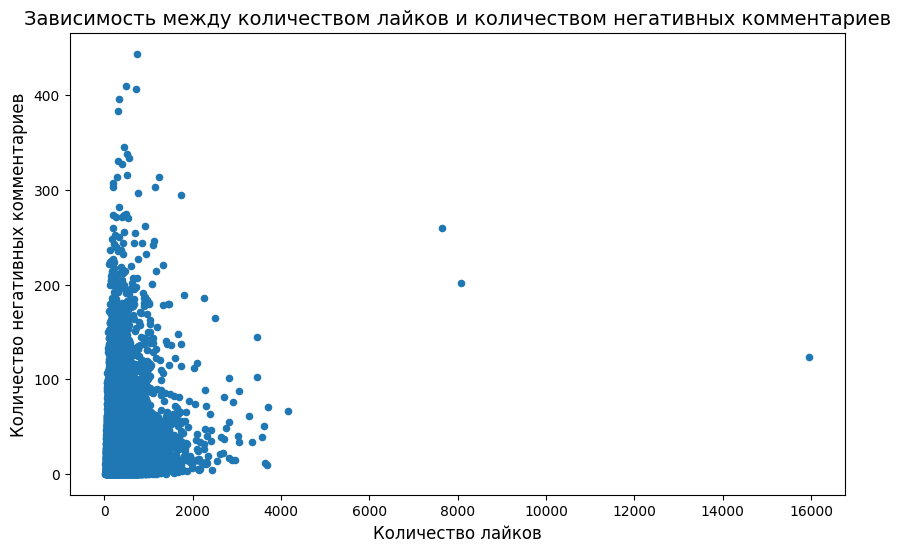

In [ ]:
# 1 визуализация

import matplotlib.pyplot as plt

ax = df_vk.plot(kind='scatter', x='likes', y='negative_count', figsize=(10, 6))

ax.set_title("Зависимость между количеством лайков и количеством негативных комментариев", fontsize=14)
ax.set_xlabel("Количество лайков", fontsize=12)
ax.set_ylabel("Количество негативных комментариев", fontsize=12)

plt.show() # нет зависимости

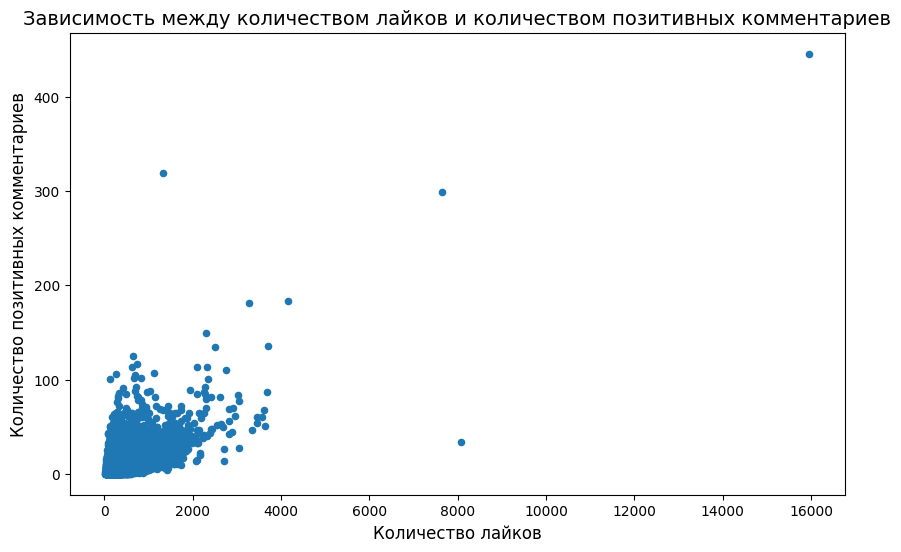

In [ ]:
# 2 визуализация

ax = df_vk.plot(kind='scatter', x='likes', y='positive_count', figsize=(10, 6))

ax.set_title("Зависимость между количеством лайков и количеством позитивных комментариев", fontsize=14)
ax.set_xlabel("Количество лайков", fontsize=12)
ax.set_ylabel("Количество позитивных комментариев", fontsize=12)

plt.show() # намек на зависимость есть!

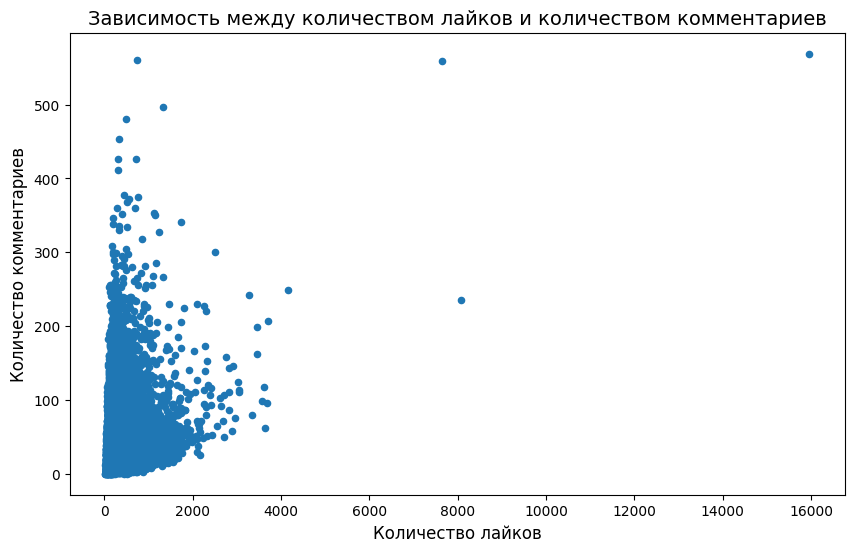

In [ ]:
# 3 визуализация (позитивные + негативные комментарии)

df_vk['positive_and_negative'] = df_vk['positive_count'] + df_vk['negative_count']

ax = df_vk.plot(kind='scatter', x='likes', y='positive_and_negative', figsize=(10, 6))

ax.set_title("Зависимость между количеством лайков и количеством комментариев", fontsize=14)
ax.set_xlabel("Количество лайков", fontsize=12)
ax.set_ylabel("Количество комментариев", fontsize=12)

plt.show() # тут не видно особой зависимости, но я решила еще добавить столбец с нейтральными комментами, чтобы было более репрезентативно

In [ ]:
df_comments_neutral = df_comments_new[df_comments_new['sentiment_verdict'] == 'neutral']
neutral_count = df_comments_neutral.groupby(['post_id', 'sentiment_verdict']).size().unstack(fill_value=0)
neutral_count.rename(columns={'neutral': 'neutral_count'}, inplace=True)

df_vk = df_vk.merge(neutral_count, left_on='id', right_on='post_id', how='left')
df_vk['neutral_count'] = df_vk['neutral_count'].fillna(0).astype(int)

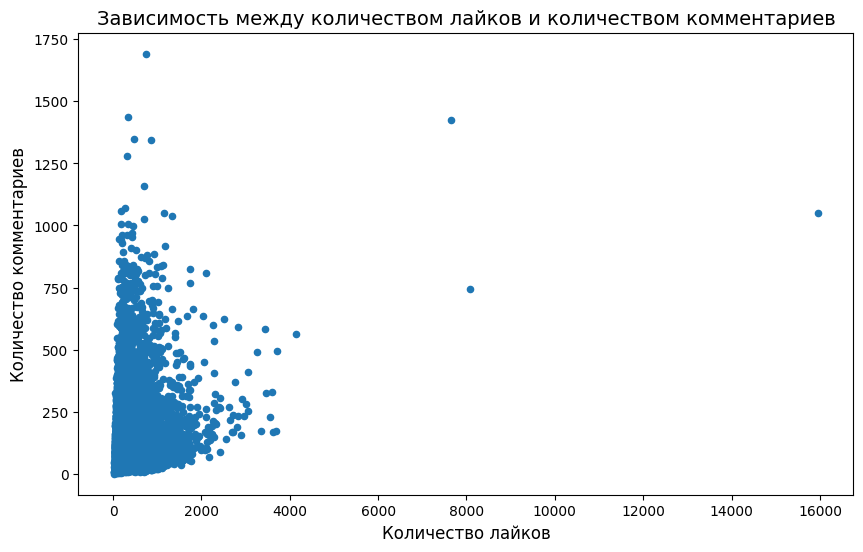

In [ ]:
# 3 визуализация (все комментарии)

df_vk['total_count'] = df_vk['positive_and_negative'] + df_vk['neutral_count']

ax = df_vk.plot(kind='scatter', x='likes', y='total_count', figsize=(10, 6))

ax.set_title("Зависимость между количеством лайков и количеством комментариев", fontsize=14)
ax.set_xlabel("Количество лайков", fontsize=12)
ax.set_ylabel("Количество комментариев", fontsize=12)

plt.show() # эх, к сожалению, зависимость даже тут не заметна

__[0.6 балла] Задание 13:__  Давайте построим по сентимент-окрасу комментариев топ позитивных новостей.

- Если под новостью оставлено 100 комментариев, из которых 80 позитивные, мы можем быть уверены в том, что новость была хорошо воспринята людьми.
- Если под новостью всего один комментарий и он оказался позитивным, то у нас 100% позитивных комментариев, но это вовсе не означает, что новость была воспринята хорошо.

Получается, что сортировать по доле позитивных комментариев нельзя. Давайте поступим умнее. Доля позитивных комментариев под постом -- это случайная величина. Её довольно часто моделируют с помощью бета-распределения. Если это случайная величина, мы можем построить для неё предиктивный интервал. Пусть $u$ - число позитивных комментариев, а $d$ - нейтральных и негативных.  Пусть

$$
a = 1 + u \qquad b = 1 + d.
$$

Тогда нижняя граница $95\%$ предиктивного интервала для доли будет вычисляться по такой формуле:

$$
\frac{a}{a + b} - 1.65 \cdot \sqrt{\frac{a \cdot b}{(a + b)^2 \cdot (a + b + 1)}}
$$

Если под новостью был всего один комментарий, у такой случайной величины будет высокая дисперсия. Это означаeт, что штука, которую мы вычитаем из доли, окажется высокой. Левая граница интервала окажется маленькой и мы не поднимем комментарий в нашем топе наверх. Фактически мы делаем сортировку по квантилю уровня $0.05$ вместо среднего.

От вас требуется вбить эту формулу, сделать сортировку и вывести на экран топ позитивных новостей. Подробнее про то, откуда берётся эта формула можно почитать [в этой книге.](https://disk.yandex.ru/i/Ctd08bTwC9eI3g) Ищите 4 главу, страницу 140.

In [ ]:
df_vk['a'] = 1 + df_vk['positive_count']
df_vk['b'] = 1 + df_vk['negative_count'] + df_vk['neutral_count']

df_vk['positive_formula'] = (df_vk['a'] / (df_vk['a'] + df_vk['b'])) - 1.65 * ((df_vk['a'] * df_vk['b']) / ((df_vk['a'] + df_vk['b'])**2 * (df_vk['a'] + df_vk['b'] + 1))).apply(np.sqrt)

del df_vk['a']
del df_vk['b']

In [ ]:
df_vk.sort_values(by=['positive_formula'], ascending=False)[:5]

,id,href,datetime,title,likes,comments,snippet,title_clean,snippet_clean,negative_count,positive_count,positive_and_negative,neutral_count,positive_formula
6651,22320852,https://rsport.ria.ru/rhythm_gym/20180913/1141...,2018-09-13 16:40:33,Сборная России выиграла командный турнир на че...,1387,53,NaN,сборная россии выиграла командный турнир на че...,#UNKN,0,34,34,16,0.566760
14020,20027260,https://rsport.ria.ru/winter2018_paralympics/2...,2018-03-16 03:54:32,"Миленина выиграла биатлонную гонку на 12,5 км,...",1106,28,Россиянка Анна Миленина завоевала седьмое золо...,миленина выиграла биатлонную гонку на 125 км с...,россиянка анна миленина завоевала седьмое золо...,0,16,16,8,0.502777
6620,22326485,https://rsport.ria.ru/shooting/20180914/114181...,2018-09-14 07:55:44,Россиянки заняли третье место в ските среди юн...,359,14,NaN,россиянки заняли третье место в ските среди юн...,#UNKN,0,10,10,4,0.502010
13735,20128079,https://rsport.ria.ru/artist_gym/20180323/1134...,2018-03-23 07:19:58,Россиянка Мельникова победила в многоборье на ...,670,17,NaN,россиянка мельникова победила в многоборье на ...,#UNKN,0,10,10,4,0.502010
12529,20591225,https://rsport.ria.ru/hockey/20180422/11358902...,2018-04-22 16:30:18,"""Ак Барс"" стал трехкратным обладателем Кубка Г...",1292,78,NaN,ак барс стал трехкратным обладателем кубка гаг...,#UNKN,3,42,45,26,0.494670


Короче, больше всего позитивных комментариев под постами о спорте!!

In [ ]:
df_vk[df_vk['id'] == 22320852]['title'] # лучшая новость.. скучаю по этому времени!

,title
6651,Сборная России выиграла командный турнир на че...


__[0.6 балла] Задание 14:__ Какие категории новостей оказались самыми позитивными? Придумайте способ найти такие категории и опишите его тут.

__Ответ:__ категории написаны только в df_ria датасете, но позитивная формула просчитана только для df_vk, так что надо найти способ связать эти 2 датасета.
У них есть несколько общих столбцов (смотрела отдельно df_vk.columns и df_ria.columns), но я решила, что логичнее будет объединять через title_clean, потому что это уже отформатировано и гарантировано одинаково для обоих датасетов. Изначально брала href, но значения не совпадали и были одни nan.

Рассказываю порядок действий:

1) создаю датасет, где находятся только самые позитивные комментарии

2) с помощью merge на основе общего столбца title_clean добавляю столбец category

3) с помощью groupby смотрю, как часто повторяются самые позитивные категории

In [ ]:
df_vk_most_positive = df_vk.sort_values(by=['positive_formula'], ascending=False)[:30]

df_vk_ria = df_vk_most_positive.merge(df_ria[['title_clean', 'category']], on='title_clean')
df_vk_ria.groupby(['category']).size() # почти все спорт!

,0
category,
Культура,1
Происшествия,1
Спорт,7
Туризм,1


In [ ]:
# для интереса еще тэги вывела
df_vk_most_positive = df_vk.sort_values(by=['positive_formula'], ascending=False)[:30]

df_vk_ria = df_vk_most_positive.merge(df_ria[['title_clean', 'tags']], on='title_clean')
df_vk_ria['tags']

,tags
0,"биатлон - пхенчхан 2018,пхенчхан 2018,паралимп..."
1,"спорт,стрелковый спорт"
2,спортивная гимнастика
3,финал кубка гагарина-2018 между хоккеистами ка...
4,"спорт,олимпийские игры"
5,"новости - чемпионат мира по футболу 2018,спорт..."
6,"городской округ балашиха,происшествия"
7,"финляндия,новости - туризм,туризм"
8,художественная гимнастика
9,"эдуард успенский,россия,умер писатель эдуард у..."


__[0.2 балла] Бонусное задание 3:__ Проанализируйте, как температура комментария (вероятность того, что он негативный) зависит от длины трэда (число комментариев под новостью)? Значима ли эта взаимосвязь? Если вам для проверки этого хочется построить линейную регрессию, не сдерживайтесь.

In [ ]:
# your code here
# ヾ(๑╹◡╹)ﾉ